# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset yang digunakan: Titanic - Machine Learning from Disaster
Tujuan: Memprediksi kelangsungan hidup penumpang (Survived)
Sumber: Kaggle (train.csv dan test.csv)

(https://www.kaggle.com/c/titanic/data?select=test.csv)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# 3. Memuat Dataset

# Hubungkan Google Colab ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Hubungkan Google Colab ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Tentukan path ke dataset Anda di Google Drive
file_path = '/content/drive/MyDrive/Esperimen_SML_Iwan-Aslich/dataset_raw/train.csv'

# Muat dataset
try:
    df = pd.read_csv(file_path)
    print("Dataset berhasil dimuat!")
    print(f"Jumlah baris dan kolom: {df.shape}")
except FileNotFoundError:
    print(f"Error: File tidak ditemukan di {file_path}. Pastikan path sudah benar dan file ada.")

# Tampilkan beberapa baris awal dataset
print("\nBeberapa baris awal dataset:")
print(df.head())

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset berhasil dimuat!
Jumlah baris dan kolom: (891, 12)

Beberapa baris awal dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.


Informasi umum dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Statistik deskriptif untuk fitur numerik:

Jumlah missing values per kolom:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch    

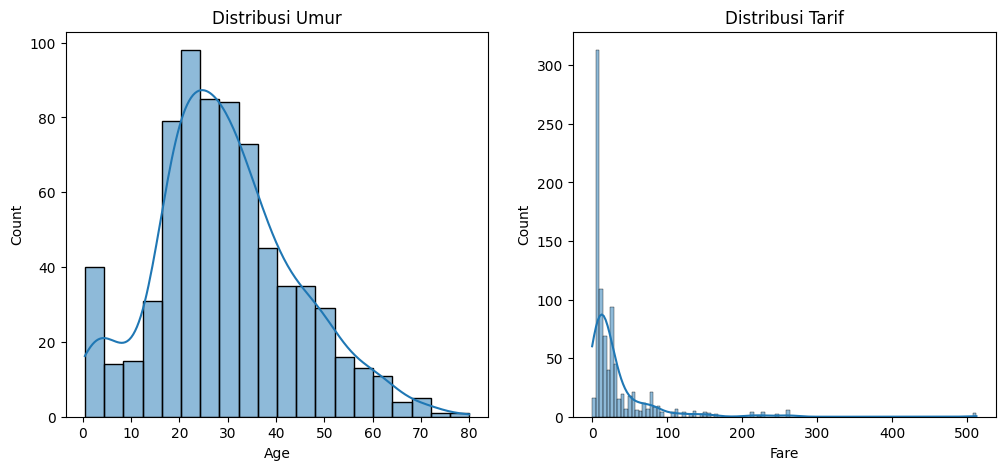

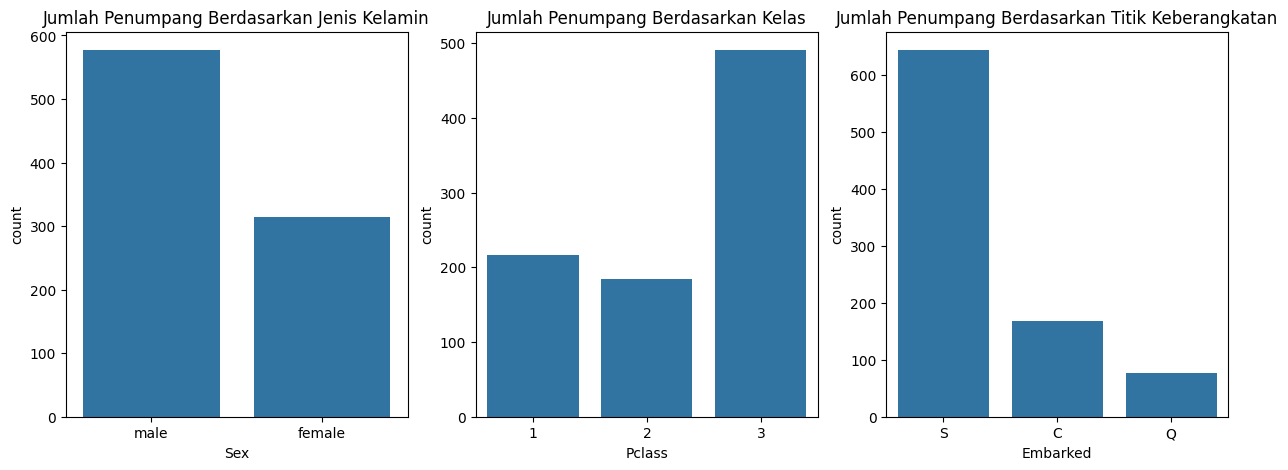

In [3]:
print("\nInformasi umum dataset:")
df.info()

print("\nStatistik deskriptif untuk fitur numerik:")
df.describe()

print("\nJumlah missing values per kolom:")
print(df.isnull().sum())

print("\nPersentase missing values per kolom:")
print(df.isnull().sum() / len(df) * 100)

print(f"\nJumlah baris duplikat: {df.duplicated().sum()}")

print("\nDistribusi fitur 'Survived':")
print(df['Survived'].value_counts())
print(df['Survived'].value_counts(normalize=True) * 100) # Persentase

print("\nDistribusi fitur 'Sex':")
print(df['Sex'].value_counts())

print("\nDistribusi fitur 'Embarked':")
print(df['Embarked'].value_counts())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Distribusi Umur')

plt.subplot(1, 2, 2)
sns.histplot(df['Fare'], kde=True)
plt.title('Distribusi Tarif')
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Sex', data=df)
plt.title('Jumlah Penumpang Berdasarkan Jenis Kelamin')

plt.subplot(1, 3, 2)
sns.countplot(x='Pclass', data=df)
plt.title('Jumlah Penumpang Berdasarkan Kelas')

plt.subplot(1, 3, 3)
sns.countplot(x='Embarked', data=df)
plt.title('Jumlah Penumpang Berdasarkan Titik Keberangkatan')
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
# Membuat salinan DataFrame untuk preprocessing agar tidak mengubah DataFrame asli
df_preprocessed = df.copy()

# Menangani Missing Values
# Kolom 'Embarked': Mengisi missing values dengan modus (mode)
# Karena hanya ada 2 missing values dan ini adalah fitur kategorikal.
mode_embarked = df_preprocessed['Embarked'].mode()[0]
df_preprocessed['Embarked'].fillna(mode_embarked, inplace=True)
print(f"Missing values di 'Embarked' setelah diisi modus ({mode_embarked}): {df_preprocessed['Embarked'].isnull().sum()}")

# Kolom 'Age': Mengisi missing values dengan median
# Median lebih robust terhadap outlier dibandingkan mean.
median_age = df_preprocessed['Age'].median()
df_preprocessed['Age'].fillna(median_age, inplace=True)
print(f"Missing values di 'Age' setelah diisi median ({median_age}): {df_preprocessed['Age'].isnull().sum()}")

# Kolom 'Cabin': Menangani missing values dengan membuat fitur baru (binary)
# Karena terlalu banyak missing values, kita bisa membuat fitur biner 'HasCabin'
# yang menunjukkan apakah penumpang memiliki informasi kabin atau tidak.
df_preprocessed['HasCabin'] = df_preprocessed['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

# Setelah itu, kita bisa menghapus kolom 'Cabin' asli
df_preprocessed.drop('Cabin', axis=1, inplace=True)
print(f"Missing values di 'Cabin' (sekarang HasCabin) setelah diproses: {df_preprocessed['HasCabin'].isnull().sum()}")


# Feature Engineering

# Membuat fitur FamilySize: SibSp + Parch + 1 (untuk diri sendiri)
df_preprocessed['FamilySize'] = df_preprocessed['SibSp'] + df_preprocessed['Parch'] + 1
print("\nFitur 'FamilySize' berhasil dibuat.")

# Membuat fitur IsAlone: 1 jika FamilySize = 1, 0 jika tidak
df_preprocessed['IsAlone'] = df_preprocessed['FamilySize'].apply(lambda x: 1 if x == 1 else 0)
print("Fitur 'IsAlone' berhasil dibuat.")

# Mengekstrak Title (Gelar) dari kolom 'Name'
# Gelar seringkali mengindikasikan status sosial atau umur
df_preprocessed['Title'] = df_preprocessed['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
# Beberapa gelar mungkin jarang, kita bisa mengelompokkannya
common_titles = ['Mr', 'Miss', 'Mrs', 'Master']
df_preprocessed['Title'] = df_preprocessed['Title'].apply(lambda x: x if x in common_titles else 'Rare')
print("Fitur 'Title' berhasil dibuat dan dikelompokkan.")

# Menghapus Fitur Tidak Berguna

# Hapus kolom yang tidak akan digunakan untuk modeling
# PassengerId: ID unik, tidak relevan untuk prediksi
# Name: Sudah diekstrak 'Title'
# Ticket: Nomor tiket, sulit diekstrak informasi berguna
# SibSp, Parch: Sudah digabungkan menjadi FamilySize
df_preprocessed.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'], axis=1, inplace=True)
print("\nKolom tidak berguna berhasil dihapus.")

# Encoding Data Kategorikal

# Identifikasi kolom kategorikal yang tersisa
categorical_cols = ['Sex', 'Embarked', 'Pclass', 'Title'] # Pclass diperlakukan sebagai kategorikal karena merepresentasikan kelas

# Terapkan One-Hot Encoding
# Menggunakan pd.get_dummies() sangat mudah untuk ini
df_preprocessed = pd.get_dummies(df_preprocessed, columns=categorical_cols, drop_first=True) # drop_first=True menghindari dummy variable trap
print("\nFitur kategorikal berhasil di-encode.")

# Tampilkan beberapa baris awal dataset setelah preprocessing
print("\nDataFrame setelah Preprocessing:")
print(df_preprocessed.head())

# Periksa lagi missing values setelah preprocessing (seharusnya sudah 0)
print("\nMissing values setelah preprocessing:")
print(df_preprocessed.isnull().sum())

Missing values di 'Embarked' setelah diisi modus (S): 0
Missing values di 'Age' setelah diisi median (28.0): 0
Missing values di 'Cabin' (sekarang HasCabin) setelah diproses: 0

Fitur 'FamilySize' berhasil dibuat.
Fitur 'IsAlone' berhasil dibuat.
Fitur 'Title' berhasil dibuat dan dikelompokkan.

Kolom tidak berguna berhasil dihapus.

Fitur kategorikal berhasil di-encode.

DataFrame setelah Preprocessing:
   Survived   Age     Fare  HasCabin  FamilySize  IsAlone  Sex_male  \
0         0  22.0   7.2500         0           2        0      True   
1         1  38.0  71.2833         1           2        0     False   
2         1  26.0   7.9250         0           1        1     False   
3         1  35.0  53.1000         1           2        0     False   
4         0  35.0   8.0500         0           1        1      True   

   Embarked_Q  Embarked_S  Pclass_2  Pclass_3  Title_Miss  Title_Mr  \
0       False        True     False      True       False      True   
1       False       Fal

<ipython-input-4-71ffd2913bd9>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_preprocessed['Embarked'].fillna(mode_embarked, inplace=True)
<ipython-input-4-71ffd2913bd9>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [5]:
if 'df_preprocessed' in locals():
    # Nama file untuk diunduh
    output_filename = 'titanic_preprocessed.csv'

    # Simpan DataFrame ke file CSV lokal di lingkungan Colab
    df_preprocessed.to_csv(output_filename, index=False)

    # Mengunduh file dari lingkungan Colab ke komputer lokal Anda
    from google.colab import files
    files.download(output_filename)

    print(f"\nFile '{output_filename}' berhasil dibuat dan siap diunduh ke komputer Anda.")
    print("Silakan cek folder 'Downloads' di komputer Anda.")
else:
    print("Error: DataFrame 'df_preprocessed' belum terbentuk. Pastikan semua langkah preprocessing sudah dijalankan.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


File 'titanic_preprocessed.csv' berhasil dibuat dan siap diunduh ke komputer Anda.
Silakan cek folder 'Downloads' di komputer Anda.


In [6]:
print("Daftar Kolom dan Urutan:")
print(df_preprocessed.columns.tolist())
print("\nTipe Data Setiap Kolom:")
print(df_preprocessed.dtypes)

Daftar Kolom dan Urutan:
['Survived', 'Age', 'Fare', 'HasCabin', 'FamilySize', 'IsAlone', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']

Tipe Data Setiap Kolom:
Survived        int64
Age           float64
Fare          float64
HasCabin        int64
FamilySize      int64
IsAlone         int64
Sex_male         bool
Embarked_Q       bool
Embarked_S       bool
Pclass_2         bool
Pclass_3         bool
Title_Miss       bool
Title_Mr         bool
Title_Mrs        bool
Title_Rare       bool
dtype: object
